<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Dataquest_Guided_Project_Exploring_Used_Cars_for_Sale_on_eBay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando Carros Usados à Venda no eBay Alemão
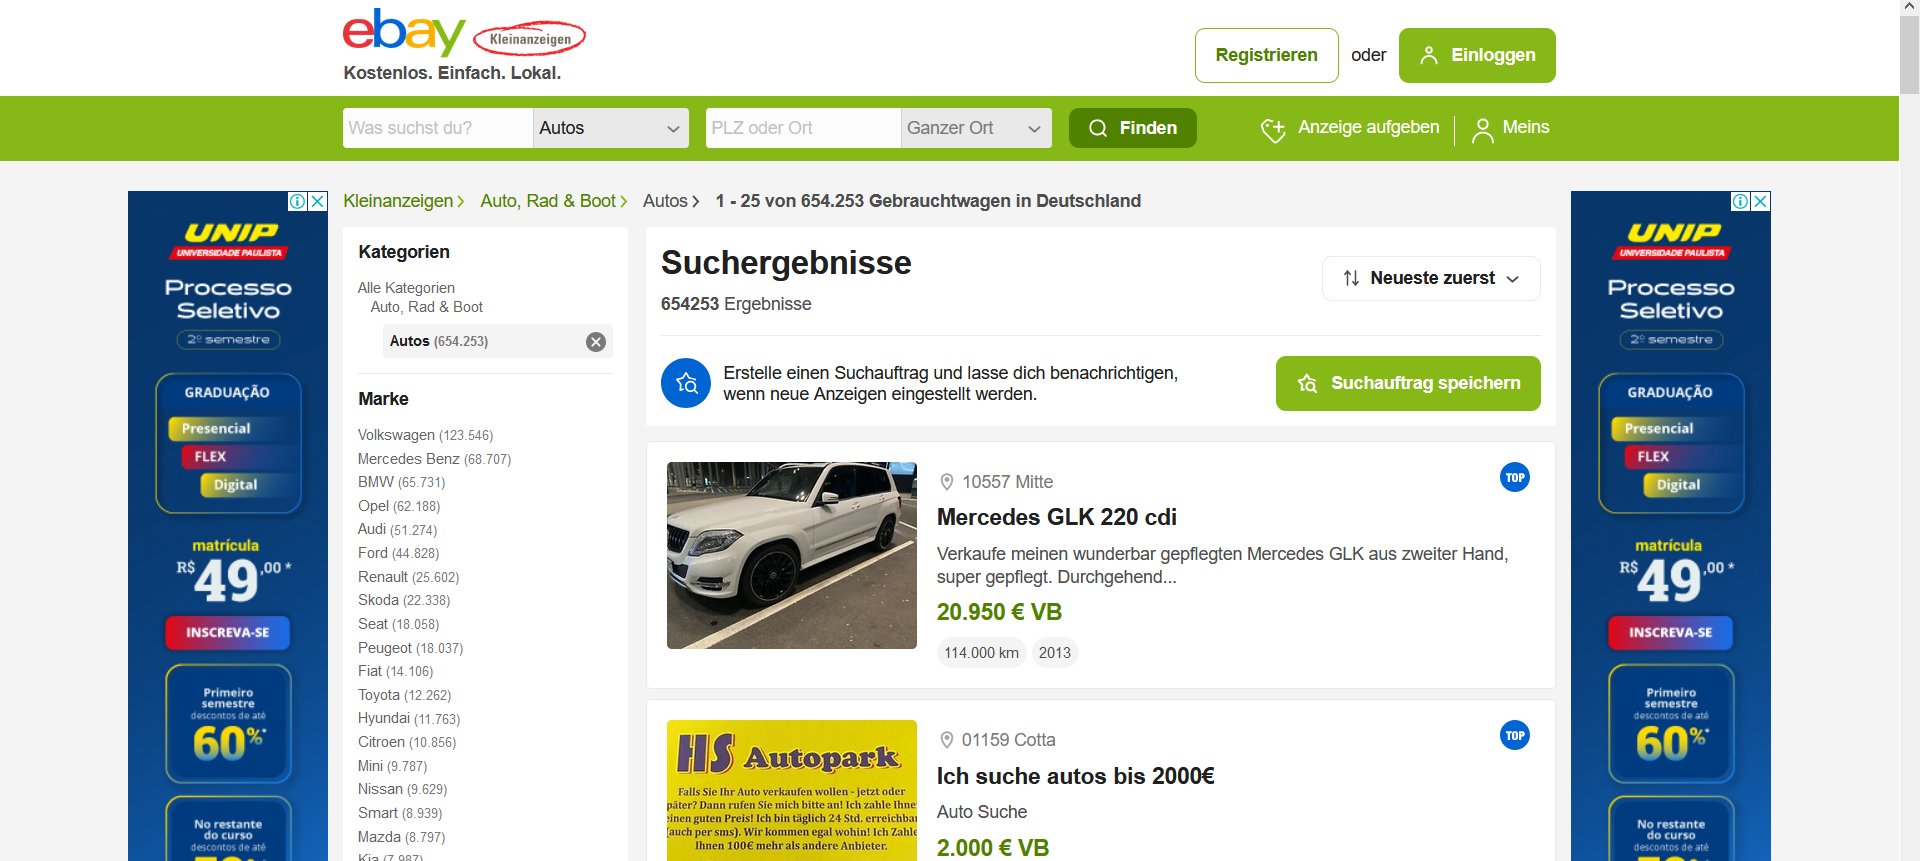

Para fixação do conteúdo aprendido durante o curso *Pandas and NumPy Fundamentals* da plataforma Dataquest, vamos explorar um dataset que originalmente foi gerado através da técnica de webscrapping por um usuário do Kaggle. Apesar de o dataset original não estar mais disponível, é possível encontra-lo [neste link](https://data.world/data-society/used-cars-data)

#Leitura do dataset

Para iniciar vamos  importar as bibliotecas e o csv para fazer a primeira leitura dos dados.

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#armazenando os dados em um dataframe lendo direto da URL
#foi necessário informar outra codificação diferente do padrão UTF-8
df = pd.read_csv('https://query.data.world/s/j423h6g3vxgyszsciguursbcqos3uo',
                 encoding='Latin-1')

#amostrando 10 linhas para leitura
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
245228,2016-03-25 16:41:21,Fiat_124,privat,Angebot,10950,control,cabrio,1983,manuell,103,andere,80000,8,benzin,fiat,nein,2016-03-25 00:00:00,0,49835,2016-04-06 20:48:25
228324,2016-03-27 09:54:50,BMW_135i_Cabrio_Aut.,privat,Angebot,20600,test,cabrio,2010,automatik,306,1er,40000,7,benzin,bmw,nein,2016-03-27 00:00:00,0,14542,2016-04-05 03:16:47
19490,2016-03-28 21:58:22,Passat_3b_1.6,privat,Angebot,1500,control,kombi,1999,manuell,101,passat,150000,0,benzin,volkswagen,nein,2016-03-28 00:00:00,0,89250,2016-04-01 08:45:11
306278,2016-03-12 23:37:35,Zafira_2.0_disel_Klima,privat,Angebot,1999,control,bus,2003,manuell,101,NaN,150000,3,diesel,opel,NaN,2016-03-12 00:00:00,0,48336,2016-03-13 06:42:13
21700,2016-03-05 16:47:54,Nissan_Micra_Diesel,privat,Angebot,2500,control,kleinwagen,2003,manuell,0,micra,150000,5,diesel,nissan,nein,2016-03-05 00:00:00,0,47533,2016-04-01 14:15:57
4053,2016-04-01 09:37:17,Volkswagen_Passat_Variant_1.9_TDI_Comfortline_...,privat,Angebot,3780,test,kombi,2004,manuell,101,passat,150000,5,diesel,volkswagen,nein,2016-04-01 00:00:00,0,68766,2016-04-07 05:46:52
293557,2016-03-09 13:46:59,Ford_Mondeo_V6_Limo_Mit_LPG_AUTOGAS_6Gang_Mode...,privat,Angebot,3400,control,limousine,2003,manuell,170,mondeo,150000,12,lpg,ford,nein,2016-03-09 00:00:00,0,45879,2016-03-09 13:46:59
359457,2016-04-03 22:57:01,VW_Golf_5_R32_4Motion_Tausche_gegen_Audi_S5,privat,Angebot,16900,control,NaN,2017,manuell,250,golf,150000,2,NaN,volkswagen,nein,2016-04-03 00:00:00,0,59846,2016-04-06 00:16:10
321362,2016-03-21 23:51:35,Peugeot_3008_HDi_FAP_165_Automatik,privat,Angebot,13900,test,bus,2011,automatik,163,3_reihe,100000,3,diesel,peugeot,nein,2016-03-21 00:00:00,0,65620,2016-04-06 02:46:01
119814,2016-03-26 10:57:52,Subaru_Tribeca_3.6R_Automatik_Comfort__LPG_,privat,Angebot,13900,test,limousine,2008,automatik,258,andere,125000,9,benzin,subaru,nein,2016-03-26 00:00:00,0,50126,2016-04-05 22:47:30


In [ ]:
linhas, colunas = df.shape
print(f'O dataframe possui {linhas} linhas e {colunas} colunas')

O dataframe possui 371528 linhas e 20 colunas


Antes de inciar, vamos olhar o **dicionário dos dados** para entender os dados antes de utiliza-los. Originalmente o dicionário foi apresentado em inglês e foi realizada uma tradução livre, com ajuda dos próprios dados em si, de uma forma que fizesse mais sentido no português.
<BR><BR>

| Campos                 | Descrição|
|------------------------|------------------------------------------------|
| dateCrawled          | Data da extração do anúncio |
| name                 | Título do anúncio (nome/características  do carro anunciado)|
| seller               | Se o vendedor é privado ou negociante |
| offerType            | Tipo de anúncio |
| price                | Preço do carro anunciado |
| abtest               | Classificação do teste A/B (grupo teste ou controle) |
| vehicleType          | Tipo de veículo |
| yearOfRegistration   | Ano de registro do carro |
| gearbox              | O tipo de câmbio |
| powerPS              | A potência do carro medida em cavalos |
| model                | Modelo do carro |
| kilometer            | Quantos quilômetros o carro já rodou |
| monthOfRegistration  | Mês de registro do carro |
| fuelType             | Tipo de combustível que o carro utiliza |
| brand                | Marca do carro |
| notRepairedDamage    | Se o carro possui danos ainda não reparados |
| dateCreated          | Data em que o anúncio foi criado |
| nrOfPictures         | Quantidade de fotos do carro o anúncio possui |
| postalCode           | CEP com localização do carro |
| lastSeen             | Última vez que o anúncio foi visto online por quem coletou os dados |

Com o método ```info```é possível notar que as seguintes informações possuem dados nulos:

* VehicleType
* gearbox
* model
* fuelType
* notRepairedDamage (info que possui mais nulos)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Antes de trabalhar os dados, vamos padronizar o nome das colunas utilizando o padrão snakecase que é mais apropriado e recomendado pelas boas práticas do Python.


In [ ]:
df.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
              'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
              'kilometer', 'registration_month', 'fuel_type', 'brand',
              'unrepaired_damage', 'ad_created', 'nr_pictures', 'postal_code',
              'last_seen']

In [ ]:
df.head(2)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


Um método muito útil para ter os primeiros insights sobre os dados é o ```describe``` utilizando o parâmetro ```include='all'```, pois ele pode ser utilizado para analisar tanto dados numéricos como objetos (strings), mas de perspectivas diferentes, e com esse parâmetros de uma única vez conseguimos analisar esses 2 tipos de dados.

* **count** mostra quantos registros não nulos temos para cada coluna
* **unique** mostra quantos valores não numéricos são únicos para cada coluna
* **top** mostra os valores não numéricos mais frequentes 
* **freq** mostra quantas vezes apareceu o valor mais frequente indicado no **top**
* **mean** mostra a média dos valores numéricos
* **std** o Desvio Padrão (Standard Deviation) nos dá uma noção da distribuição dos dados ao redor da média. <BR>
(se a média é 5 e temos std de 2, sabemos que em torno de 60% dos dados estão a 1 std da média, entre 3 e 7. Já mais de 95% dos dados estão distribuídos até 2 std da média, entre 1 e 9)
* **min** representa o menor valor de uma coluna com dados numéricos
* **25%** significa que até 25% dos registros do dataset tem até o valor indicado
* **50%** significa que até 50% dos registros do dataset tem até o valor indicado
* **75%** significa que até 75% dos registros do dataset tem até o valor indicado
* **max** representa o maior valor de uma coluna com dados numéricos


In [ ]:
df.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


Além dos campos com informações nulas já anotados através do ```info```, podemos observar:
* que os campos **seller, offer_type, ab_test, vehicle_type, gearbox, fuel_type, unrepaired_damage** são classificações por possuírem poucos valores únicos.
* o campo **nr_pictures** só possui um único valor, zero em todas as linhas, o que não servirá para nossa análise e podemos descartar


In [ ]:
#eliminando coluna que não é útil
df = df.drop(columns=['nr_pictures'])

In [ ]:
#conferindo opções do campo e quantos registros cada opção apresenta
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [ ]:
df['offer_type'].value_counts()

Angebot    371516
Gesuch         12
Name: offer_type, dtype: int64

In [ ]:
df['ab_test'].value_counts()

test       192585
control    178943
Name: ab_test, dtype: int64

In [ ]:
df['vehicle_type'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicle_type, dtype: int64

In [ ]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [ ]:
df['fuel_type'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuel_type, dtype: int64

In [ ]:
df['unrepaired_damage'].value_counts()

nein    263182
ja       36286
Name: unrepaired_damage, dtype: int64

Foi necessário alterar as configurações do Python para não utilizar notação científica ao executar o describe no campo 'price', pois dificulta a análise.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df['price'].describe()

count       371528.00
mean         17295.14
std        3587953.74
min              0.00
25%           1150.00
50%           2950.00
75%           7200.00
max     2147483647.00
Name: price, dtype: float64

Temos desde valores muito baixos como muito altos que podemos considerar outliers em nossa análise

In [ ]:
df['price'].value_counts().sort_index(ascending=True)

0             10778
1              1189
2                12
3                 8
4                 1
              ...  
32545461          1
74185296          1
99000000          1
99999999         15
2147483647        1
Name: price, Length: 5597, dtype: int64

Abaixo podemos ter o mesmo entendimento que feito através do método describe, porém aqui de forma mais visual. Quase todos os resultados tem valores entre 1.000 e 10.000, sendo assim vamos eliminar todo o restante que pode distorcer as análises.

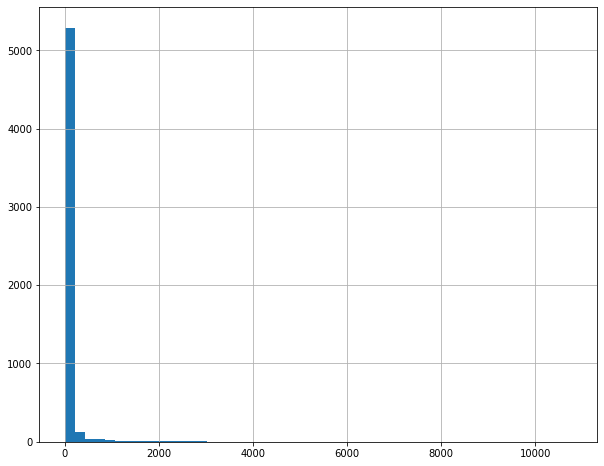

In [ ]:
plt.figure(figsize=(10,8))
df['price'].value_counts().sort_index(ascending=False).hist(bins=50);

In [ ]:
df_cleaned =  df[df['price'].between(1000,1000000)]

In [ ]:
df_cleaned.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,288128,288128,288128,288128,288128.00,288128,267465,288128.00,277574,288128.00,275951,288128.00,288128.00,270322,288128,245438,288128,288128.00,288128
unique,231992,177311,2,2,nan,2,8,nan,2,nan,251,nan,nan,7,40,2,112,nan,145068
top,2016-03-05 14:25:23,BMW_318i,privat,Angebot,nan,test,limousine,nan,manuell,nan,golf,nan,nan,benzin,volkswagen,nein,2016-04-03 00:00:00,nan,2016-04-07 06:45:59
freq,5,561,288126,288124,nan,149377,78607,nan,207516,nan,22985,nan,nan,163610,61679,228265,11525,nan,17
mean,NaN,NaN,NaN,NaN,7364.04,NaN,NaN,2005.15,NaN,127.74,NaN,122704.18,6.02,NaN,NaN,NaN,NaN,51651.30,NaN
std,NaN,NaN,NaN,NaN,13804.51,NaN,NaN,65.54,NaN,195.11,NaN,40824.38,3.59,NaN,NaN,NaN,NaN,25701.22,NaN
min,NaN,NaN,NaN,NaN,1000.00,NaN,NaN,1000.00,NaN,0.00,NaN,5000.00,0.00,NaN,NaN,NaN,NaN,1067.00,NaN
25%,NaN,NaN,NaN,NaN,2200.00,NaN,NaN,2001.00,NaN,80.00,NaN,100000.00,3.00,NaN,NaN,NaN,NaN,31226.00,NaN
50%,NaN,NaN,NaN,NaN,4350.00,NaN,NaN,2005.00,NaN,116.00,NaN,150000.00,6.00,NaN,NaN,NaN,NaN,50823.00,NaN
75%,NaN,NaN,NaN,NaN,8950.00,NaN,NaN,2009.00,NaN,160.00,NaN,150000.00,9.00,NaN,NaN,NaN,NaN,72469.00,NaN


Agora olhando para as datas, vamos checar a distribuição das datas.
É possível observar que as datas date_crawled e last_seen possuem o mesmo intervalo de 05/03/2016 a 07/04/2016, enquanto que ad_created possui datas mais antigas desde 2014.


In [ ]:
df_cleaned['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05   0.03
2016-03-06   0.01
2016-03-07   0.04
2016-03-08   0.03
2016-03-09   0.03
2016-03-10   0.03
2016-03-11   0.03
2016-03-12   0.04
2016-03-13   0.02
2016-03-14   0.04
2016-03-15   0.03
2016-03-16   0.03
2016-03-17   0.03
2016-03-18   0.01
2016-03-19   0.04
2016-03-20   0.04
2016-03-21   0.04
2016-03-22   0.03
2016-03-23   0.03
2016-03-24   0.03
2016-03-25   0.03
2016-03-26   0.03
2016-03-27   0.03
2016-03-28   0.04
2016-03-29   0.03
2016-03-30   0.03
2016-03-31   0.03
2016-04-01   0.03
2016-04-02   0.04
2016-04-03   0.04
2016-04-04   0.04
2016-04-05   0.01
2016-04-06   0.00
2016-04-07   0.00
Name: date_crawled, dtype: float64

In [ ]:
df_cleaned['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2014-03-10   0.00
2015-03-20   0.00
2015-06-11   0.00
2015-06-18   0.00
2015-08-07   0.00
             ... 
2016-04-03   0.04
2016-04-04   0.04
2016-04-05   0.01
2016-04-06   0.00
2016-04-07   0.00
Name: ad_created, Length: 112, dtype: float64

In [ ]:
df_cleaned['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05   0.00
2016-03-06   0.00
2016-03-07   0.00
2016-03-08   0.01
2016-03-09   0.01
2016-03-10   0.01
2016-03-11   0.01
2016-03-12   0.02
2016-03-13   0.01
2016-03-14   0.01
2016-03-15   0.02
2016-03-16   0.02
2016-03-17   0.03
2016-03-18   0.01
2016-03-19   0.02
2016-03-20   0.02
2016-03-21   0.02
2016-03-22   0.02
2016-03-23   0.02
2016-03-24   0.02
2016-03-25   0.02
2016-03-26   0.02
2016-03-27   0.02
2016-03-28   0.02
2016-03-29   0.02
2016-03-30   0.02
2016-03-31   0.02
2016-04-01   0.02
2016-04-02   0.02
2016-04-03   0.02
2016-04-04   0.02
2016-04-05   0.13
2016-04-06   0.23
2016-04-07   0.14
Name: last_seen, dtype: float64

Agora olhando o ano de registro dos carros é possível enxergar outliers, anos muito pequenos ou muito grandes para ser um ano válido. Sendo assim escolhi um intervalo entre 1900 e 2021 que parece razoável. 

In [ ]:
df_cleaned['registration_year'].describe()

count   288128.00
mean      2005.15
std         65.54
min       1000.00
25%       2001.00
50%       2005.00
75%       2009.00
max       9999.00
Name: registration_year, dtype: float64

In [ ]:
df_cleaned = df_cleaned[df_cleaned['registration_year'].between(1900,2021)]

In [ ]:
df_cleaned['registration_year'].describe()

count   288058.00
mean      2004.43
std          7.38
min       1910.00
25%       2001.00
50%       2005.00
75%       2009.00
max       2019.00
Name: registration_year, dtype: float64

Agora que fizemos uma limpeza nos dados, vamos começar a analisar os dados, começando pelo preço médio das marcas de carros.
Foi selecionado as 20 marcas com mais resultados no dataset


In [ ]:
brands = df_cleaned['brand'].value_counts().head(20).index
brands

Index(['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel', 'ford', 'renault',
       'peugeot', 'fiat', 'skoda', 'seat', 'smart', 'toyota', 'mazda',
       'citroen', 'nissan', 'mini', 'hyundai', 'sonstige_autos', 'volvo'],
      dtype='object')

Abaixo calculamos o preço médio por marca e armazenamos em um dicionário o resultado a ser exibido.

In [ ]:
mean_price_by_brand = {} 
for brand in brands:
  mean_price = df_cleaned[df_cleaned['brand'] == brand]['price'].mean()
  mean_price_by_brand[brand] = mean_price

mean_price_by_brand

{'audi': 10002.437497823134,
 'bmw': 9236.103138257522,
 'citroen': 4562.857178968655,
 'fiat': 4084.7365582611537,
 'ford': 5293.02762827413,
 'hyundai': 6257.530093337625,
 'mazda': 5142.447336995462,
 'mercedes_benz': 9209.244655432596,
 'mini': 10038.627403846154,
 'nissan': 6322.108232584917,
 'opel': 4214.810595350298,
 'peugeot': 4044.159322033898,
 'renault': 3505.482780787951,
 'seat': 5673.966462246071,
 'skoda': 6883.524219797052,
 'smart': 3837.6861590239796,
 'sonstige_autos': 18996.128276826286,
 'toyota': 5746.405015377336,
 'volkswagen': 6564.104103146286,
 'volvo': 6614.6357027463655}

Para organizar os dados, uma forma mais prática que podemos utilizar é converter em um objeto do tipo Series (que se comporta como uma coluna de um DataFrame) e portando ter acesso aos métodos que usamos no DataFrame como o de ordenar

In [ ]:
serie_brand_price = pd.Series(mean_price_by_brand)
serie_brand_price.sort_values(ascending=False)

sonstige_autos   18996.13
mini             10038.63
audi             10002.44
bmw               9236.10
mercedes_benz     9209.24
skoda             6883.52
volvo             6614.64
volkswagen        6564.10
nissan            6322.11
hyundai           6257.53
toyota            5746.41
seat              5673.97
ford              5293.03
mazda             5142.45
citroen           4562.86
opel              4214.81
fiat              4084.74
peugeot           4044.16
smart             3837.69
renault           3505.48
dtype: float64

Também é interessante calcular a quilometragem média por marca, assim descobrimos quais marcas é melhor evitar por estarem muito rodados

In [ ]:
mean_mileage_by_brand = {}

for brand in brands:
  mean_mileage = df_cleaned[df['brand'] == brand]['kilometer'].mean()
  mean_mileage_by_brand[brand] = mean_mileage

serie_brand_mileage = pd.Series(mean_mileage_by_brand)
serie_brand_mileage.sort_index(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


volvo            136064.22
volkswagen       125823.39
toyota           115081.62
sonstige_autos    89106.96
smart             98085.82
skoda            112593.34
seat             115469.53
renault          121255.85
peugeot          120168.89
opel             123366.52
nissan           112020.73
mini              94788.16
mercedes_benz    129925.33
mazda            121171.48
hyundai          100197.94
ford             119671.99
fiat             108047.88
citroen          116008.59
bmw              132325.60
audi             128338.44
dtype: float64

In [ ]:
df_by_brand['mean_mileage'] = serie_brand_mileage
df_by_brand['mean_price'] = serie_brand_price
df_by_brand

,mean_mileage,mean_price
volkswagen,125823.39,6564.10
bmw,132325.60,9236.10
mercedes_benz,129925.33,9209.24
audi,128338.44,10002.44
opel,123366.52,4214.81
ford,119671.99,5293.03
renault,121255.85,3505.48
peugeot,120168.89,4044.16
fiat,108047.88,4084.74
skoda,112593.34,6883.52


#Considerações Finais

Por hora esse estudo encerra aqui, mas segue algumas ideias ou tratamentos nos dados ainda a serem explorados:

* Traduzir campos com opções em alemão para inglês ou português
* Investigar a diferença nos preços entre carros com reparos pendentes ou não
* Investigar modelos mais/menos anunciados
* Investigar quais regiões tem mais carros anunciados, podendo gerar mapas
* Buscar datasets complementares que permitam por exemplo comparar o preço de um carro novo ou seminovo em uma concessionária e comparar com os anúncios em busca de encontrar o melhor custo-benefício

